# detrending time series data that has seasonality

In the notebook below I load the data from a .pkl and reduce the original dataframe `df` to a simpler dataframe `df_spring`

Your task is to remove the trend from values in the `EAST` column in `df_spring`. The trend is the upward linear slope of data. After removing the trend, you should end up with flat bumpy data. 

After removing the trend, plot the de-trended data and place the revised values in `df_spring_detrended` with columns `HOUR_End` and `EAST power detrended`

### context for task

Q: Why is removing the trend useful?<BR>
Answer: because follow-on tasks like determining periodicity and noise depend on the data not having an upward or downward slope.
    
Q: How should we remove the trend?<BR>
Answer: First, determine what the trend is. This means fitting the data with a line of best fit. Key phrases for Googling: linear regression, fit a line to data<BR>
Second, once you know what the linear fit is, you'll need to subtract something from each data point such that the slope is flat (slope=0) but the bumps are still present. 

### context for data

"Electric Reliability Council of Texas (ERCOT) manages the flow of electric power to more than 25 million Texas customers -- representing about 90 percent of the state’s electric load." (<a href="http://www.ercot.com/about">source</a>)

Example report: http://www.ercot.com/content/wcm/lists/143010/2018_Long-Term_Hourly_Peak_Demand_and_Energy_Forecast_Final.pdf

Data source:<BR>
http://www.ercot.com/gridinfo/load/load_hist/

In [ ]:
import pandas
print('pandas',pandas.__version__)
import numpy
print('numpy',numpy.__version__)
import time
import matplotlib.pyplot as plt

In [ ]:
start_time=time.time()
df=pandas.read_pickle('power_data.pkl')
df.reset_index(inplace=True)
print(df.shape)
print('elapsed:',time.time()-start_time,'seconds')

There are 9 columns, one per region of monitoring

<img src="http://www.ercot.com/content/wcm/landing_pages/88828/Weather_Map.png" width="300" align='left'>

## visualize data

use plot_date to see all the data

In [ ]:
plt.plot_date(x=df['Hour_End'],y=df['EAST'],markersize=2);
plt.ylabel('power used');
plt.xlabel('year');

To get a sense of the data contents, zoom in on the first few data points

The sampling is once per hour, so to get 5 days we an look at the first 24*5 data points

In [ ]:
max_ct = 24*5
plt.plot_date(x=df['Hour_End'][0:max_ct],y=df['EAST'][0:max_ct],markersize=5);
plt.xticks(rotation=60);
plt.xlabel('time');
plt.ylabel('power used');

spring to summer

In [ ]:
start_time = 4*30*24
end_time = 4*30*24 + start_time

df_spring = pandas.concat([df['Hour_End'][start_time:end_time],  df['EAST'][start_time:end_time]], axis=1)
df_spring.reset_index(inplace=True)
df_spring.drop('index', axis=1, inplace=True)
df_spring.head()

In [ ]:
df_spring.dtypes

In [ ]:
plt.plot_date(x=df_spring['Hour_End'],y=df_spring['EAST'],markersize=3);
plt.xticks(rotation=60);
plt.xlabel('time');
plt.ylabel('power used');

# detrend 'EAST' in df_spring to get df_spring_detrended

In [13]:
df_spring_detrended.head()

,Hour_End,EAST power detrended
0,2006-05-01 01:59:59.997,-406.579046
1,2006-05-01 03:00:00.000,-467.764914
2,2006-05-01 04:00:00.003,-477.911647
3,2006-05-01 04:59:59.997,-464.769021
4,2006-05-01 06:00:00.000,-416.944569


# optional challenge 1: remove daily oscillations

https://machinelearningmastery.com/time-series-seasonality-with-python/

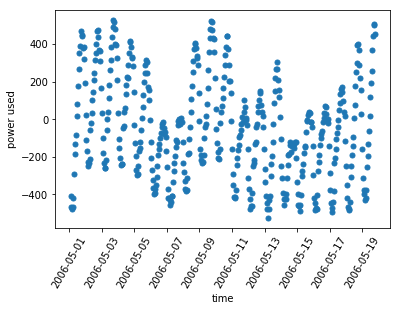

In [14]:
max_ct = 18*25
plt.plot_date(x=df_spring_detrended['Hour_End'][0:max_ct],
              y=df_spring_detrended['EAST power detrended'][0:max_ct],markersize=5);
plt.xticks(rotation=60);
plt.xlabel('time');
plt.ylabel('power used');

# optional challenge 2: remove weekly oscillations

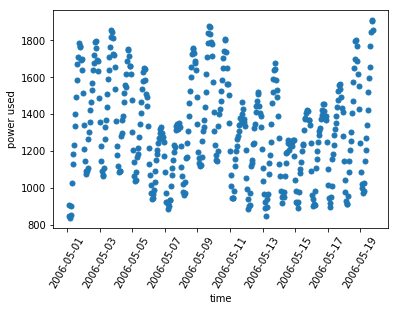

In [15]:
max_ct = 18*25
plt.plot_date(x=df_spring['Hour_End'][0:max_ct],y=df_spring['EAST'][0:max_ct],markersize=5);
plt.xticks(rotation=60);
plt.xlabel('time');
plt.ylabel('power used');

When you complete this notebook, return to the main room in Blackboard Collaborate

<BR>

<img src="https://i.imgur.com/lb2HlD9.png">